In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Adding the 3 csv files
intake_df = pd.read_csv("aac_intakes.csv", delimiter=',')
outcomes_df=pd.read_csv("aac_outcomes.csv", delimiter=',')
data_df= pd.read_csv("aac_intakes_outcomes.csv").drop_duplicates()

In [5]:
#Checking out the data head
data_df.head()


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [6]:
#Only want to focus on Dog Data
data_df.head()
dog= data_df.loc[data_df["animal_type"]=="Dog"]
dog.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [7]:
dog['Age']=dog['age_upon_outcome_(days)']/365


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
dog.round({"Age":2})

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,Age
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.000000,"(7.5, 10.0]",2017-12-07 14:07:00,...,2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10.00
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.000000,"(5.0, 7.5]",2014-12-20 16:35:00,...,2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7.00
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.000000,"(5.0, 7.5]",2014-03-08 17:10:00,...,2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6.00
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.000000,"(7.5, 10.0]",2014-04-07 15:12:00,...,2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10.00
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-16 11:54:00,...,2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16.00
5,15 years,A141142,1998-06-01 00:00:00,NaN,Return to Owner,Spayed Female,5475,15.000000,"(12.5, 15.0]",2013-11-17 11:40:00,...,2013-11-16 14:46:00,11,2013,2013-11,Saturday,14,1.0,0 days 20:54:00.000000000,0.870833,15.00
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return to Owner,Intact Female,5475,15.000000,"(12.5, 15.0]",2014-11-14 19:28:00,...,2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472,15.00
7,15 years,A165752,1999-08-18 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.000000,"(12.5, 15.0]",2014-09-15 16:35:00,...,2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194,15.00
8,15 years,A178569,1999-03-17 00:00:00,NaN,Return to Owner,Neutered Male,5475,15.000000,"(12.5, 15.0]",2014-03-23 15:57:00,...,2014-03-17 09:45:00,3,2014,2014-03,Monday,9,1.0,6 days 06:12:00.000000000,6.258333,15.00
9,18 years,A189592,1997-08-01 00:00:00,NaN,Return to Owner,Spayed Female,6570,18.000000,"(17.5, 20.0]",2015-09-18 19:04:00,...,2015-09-18 17:46:00,9,2015,2015-09,Friday,17,1.0,0 days 01:18:00.000000000,0.054167,18.00


In [8]:
#Drop duplicates

temp = dog['animal_id_outcome'].value_counts()
dup_id = temp[temp == 2].index
dog.drop(dog[dog['animal_id_outcome'] == dup_id[0]].index,inplace=True)
dog.shape

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(45351, 42)

In [9]:
df.groupby("content_id")['tag'].apply(lambda tags: ','.join(tags))

NameError: name 'df' is not defined

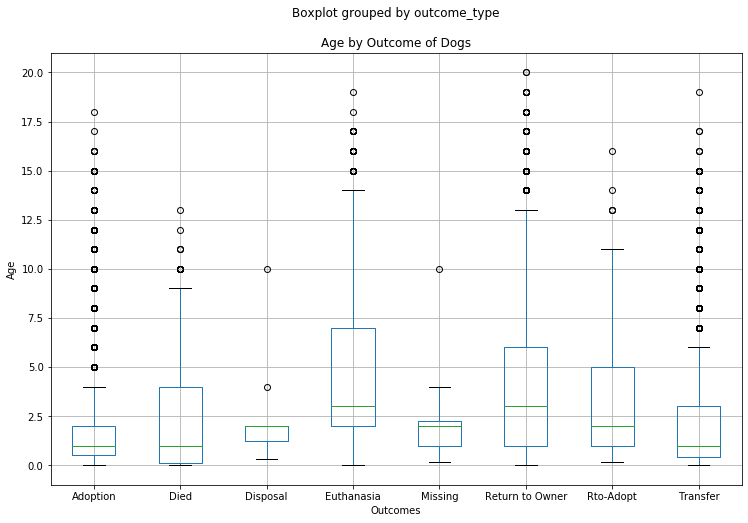

In [8]:



dog.boxplot( by = ['outcome_type'],column=['Age'], figsize=(12,8))
plt.title("Age by Outcome of Dogs")
plt.xlabel("Outcomes")
plt.ylabel("Age")
plt.show()

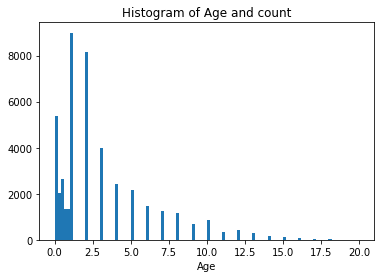

In [10]:
#Dogs Ages 
plt.hist(dog.Age,100)
plt.title("Histogram of Age and count")
plt.xlabel("Age")
plt.ylabel
plt.show()

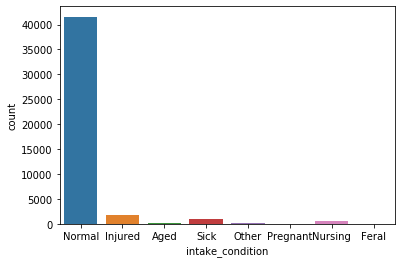

In [10]:
sns.countplot(x='intake_condition',data=dog)

In [ ]:
sns.countplot(x='outcome_type',data=dog)

In [ ]:
test['datetime_x'] =pd.to_datetime( test['datetime_x']).dt.strftime('%m/%d/%Y')
test.head()